In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math

<!-- $$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x)cos(\omega_1 t + \frac{\pi}{4})$$ -->

In [10]:
# params
w0 = 0.5
w1 = 4.0
sigma0 = 10.0
sigma1 = 0.25
# define two modes
def phi1(x, y, t):
    return 1./np.cosh((x+1)/sigma0)/np.cosh((y-1)/sigma0)*np.cos(w0*t)

def phi2(x, y, t):
    return 1./(sigma1*np.sqrt(2*np.pi))*np.exp(-((x-1)**2+(y+1)**2)/(2*sigma1**2))*np.cos(w1*t + np.pi/4)

def phi_both(x,y,t):
    return phi1(x,y,t) + phi2(x,y,t)

# mesh grids
x = np.linspace(-5, 5, 127)
y = np.linspace(-5, 5, 127)
t = np.linspace(0, 8*np.pi, 500)
xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

# data
Phi = phi1(xgrid, ygrid, tgrid) #+ 
Phi = phi2(xgrid, ygrid, tgrid)
scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
print(Phi.shape)

# print(np.argmax(Phi, axis = 0))
# print(np.max(Phi, axis = 0))
# print(np.argmax(Phi, axis = 1))

# print(x[50])
# print(y[76])
# # print(np.argmax(Phi), axis = 0)
print(np.min(Phi))
# print(xgrid[3213495])
np.argwhere(Phi > -2.4)

(127, 127, 500)
-1.5702418008137986


array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [126, 126, 497],
       [126, 126, 498],
       [126, 126, 499]], dtype=int64)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook
fig, ax = plt.subplots()

min_phi = np.min(Phi)
print(min_phi)
max_phi = np.max(Phi)
print(max_phi)

# def f(x, y):
#     return np.sin(x) + np.cos(y) 

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(500):
    im = ax.imshow(Phi[:,:,i], animated=True, vmin = min_phi, vmax = max_phi, extent=[-5, 5, 5, -5])
#     if i == 0:
#         ax.imshow(f(x, y, 0))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
fig.colorbar(im)


# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [ ]:
print(x[50])
print(y[76])
# Phi_11 = phi1(-1, 1, t) + phi2(x[50], y[76], t)
Phi_11 = phi_both(1, -1, t)
print(Phi_11.shape)

%matplotlib inline
plt.plot(t, Phi_11)
# plt.show()

# print(t)
Phi_12 = phi_both(0,0, t)#phi1(x[0], y[0], t) + phi2(x[0], y[0], t)
print(Phi_12.shape)

plt.plot(t, Phi_12)
plt.show()

print(phi1(1, 1, 0))
print(phi1(5, 5,0))

In [ ]:
plt.plot(t, phi1(1, -1, t))
plt.plot(t, phi2(1,-1, t))
plt.show()
plt.plot(phi1(1, -1, t) + phi2(1,-1, t))

(396900, 3)
(396900,)


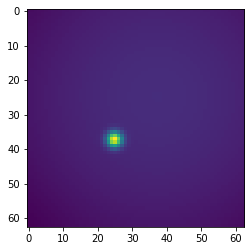

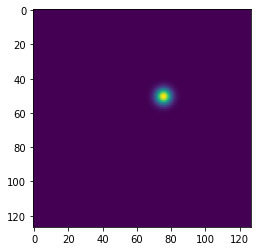

In [17]:
# print(xgrid.flatten().shape)
# print(xgrid.shape)
# print(127*127*500)

# print(Phi[1,1,1])
# # print(x)
# # print(y)
# # print(t)
# print(phi_both(x[1], y[1], t[1]))

all_combos = np.array(np.meshgrid(x, y, t)).T.reshape(-1,3)
print(all_combos.shape)

# print(
phi_all_combos = phi_both(all_combos[:,0], all_combos[:,1], all_combos[:,2])
print(phi_all_combos.shape)

first_frame = phi_all_combos[63*63*23:63*63*24].reshape(63,63)
# print(first_frame)
plt.imshow(first_frame)
plt.show()
plt.imshow(Phi[:,:,23])
plt.show()

In [19]:
phi = torch.tensor(Phi)

x = np.linspace(-5, 5, 63)
print(x)
y = np.linspace(-5, 5, 63)
t = np.linspace(0, 2*np.pi, 100)
all_combos = np.array(np.meshgrid(x, y, t)).T.reshape(-1,3)
print(all_combos.shape)

# print(
phi_all_combos = phi_both(all_combos[:,0], all_combos[:,1], all_combos[:,2])

inputs = torch.tensor(all_combos).float()
outputs = torch.tensor(phi_all_combos).float()
# p = torch.tensor([1,2,3])

# x = torch.linspace(-math.pi, math.pi, 2000)
# y = torch.sin(x)

# xx = x.unsqueeze(-1).pow(p)
input_size = 3
hidden_size = 128
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.Linear(hidden_size, 1)
#     torch.nn.Linear(3, 1),
#     torch.nn.Flatten(0, 1)
    
)

print(phi.shape)
# print("xx shape = ", xx.shape)
# print("y shape = ", y.shape)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for i in range(1):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(inputs)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, outputs)
#     if i % 100 == 99:
    print(i, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

[-5.         -4.83870968 -4.67741935 -4.51612903 -4.35483871 -4.19354839
 -4.03225806 -3.87096774 -3.70967742 -3.5483871  -3.38709677 -3.22580645
 -3.06451613 -2.90322581 -2.74193548 -2.58064516 -2.41935484 -2.25806452
 -2.09677419 -1.93548387 -1.77419355 -1.61290323 -1.4516129  -1.29032258
 -1.12903226 -0.96774194 -0.80645161 -0.64516129 -0.48387097 -0.32258065
 -0.16129032  0.          0.16129032  0.32258065  0.48387097  0.64516129
  0.80645161  0.96774194  1.12903226  1.29032258  1.4516129   1.61290323
  1.77419355  1.93548387  2.09677419  2.25806452  2.41935484  2.58064516
  2.74193548  2.90322581  3.06451613  3.22580645  3.38709677  3.5483871
  3.70967742  3.87096774  4.03225806  4.19354839  4.35483871  4.51612903
  4.67741935  4.83870968  5.        ]
(396900, 3)
torch.Size([127, 127, 500])


C:\Users\16kat\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([396900])) that is different to the input size (torch.Size([396900, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 630118440000 bytes. Buy new RAM!